# Introduction

The data that I have chosen gives us data on the 2022 crashes in Boroughs in New York City and gives us data on different situations that were involved. This dataset lists various statistics that can tell us what vehicle was involved in a particular accident or how many people died in an SUV. An important aspect of this dataset is that it can tell us about different crash rates in the city and could be used to improve the safety of pedestrians and drivers that frequently use the city roadways to commute. The data could be very useful to officials and mayors of the city to gain where they need to allocate their funding and what parts of New York City need to be more safer for the pedestrians walking the street or the people driving the cars. This dataset is interesting, because it had a majority of categorical variables for type of cars and boroughs, and discrete variables for columns such as the statistics for the number of people injured in accidents. Each row indicates an individual accident in the city. The Columns I will be using in this data are Borough, which are the categorical names of the boroughs where the accidents occurred. The primary_vehicle_in_the_accident column tells us the vehicle type that was the primary vehicle in the accident. THe number of persons injured column is the Number of persons injured in an individual accident and I also used the Number of pedestrians injured, because it had the second highest amount recorded after persons injured and it would also be useful to see if a pedestrian walking across the street could have had something to do with an accident.

Dataset: [Motor Vehicle Collisions - Crashes](https://catalog.data.gov/dataset/motor-vehicle-collisions-crashes)

# Set up and Data Wrangling

In [1]:
#loading in necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay
# For standardization
from sklearn.preprocessing import StandardScaler
# For KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB

In [2]:
#Loading in dataset chosen
crashes = pd.read_csv("collisions_borough_2022.csv")

/tmp/ipykernel_27303/2362320691.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  crashes = pd.read_csv("collisions_borough_2022.csv")


In [3]:
#dropping null values, becuase there were a hand full of columns that involved all null values
crashes = crashes.dropna(axis='columns', how='all')

In [4]:
crashes = crashes.rename(columns={"VEHICLE TYPE CODE 1": "Primary_vehicle_in_accident"})

In [5]:
#creating a new dataset for just the Boroughs brooklyn, queens, and the bronx.
crashes2 = crashes[(crashes.BOROUGH == "BROOKLYN") | (crashes.BOROUGH == "QUEENS") | (crashes.BOROUGH == "BRONX")]

In [6]:
#Finding the Counts to see what vehciles would be best to use.
crashes.Primary_vehicle_in_accident.value_counts()

Primary_vehicle_in_accident
PASSENGER VEHICLE                      43922
Sedan                                  32362
Station Wagon/Sport Utility Vehicle    23657
SPORT UTILITY / STATION WAGON          15735
TAXI                                    3630
                                       ...  
FORK LIFT                                  1
box truck                                  1
USPS TRUCK                                 1
MACK                                       1
tlc                                        1
Name: count, Length: 281, dtype: int64

In [7]:
# Had to create new dataset to include both sedan and suv into my data.
crashes3 = crashes2[(crashes2.Primary_vehicle_in_accident == "Sedan") | (crashes2.Primary_vehicle_in_accident == "SPORT UTILITY / STATION WAGON")]
crashes3

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,Primary_vehicle_in_accident,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,07/12/2022,17:50,BROOKLYN,11225.0,40.663303,-73.960490,"(40.663303, -73.96049)",NaN,NaN,44 EMPIRE BOULEVARD,...,Unspecified,NaN,NaN,NaN,4545699,Sedan,NaN,NaN,NaN,NaN
2,04/24/2022,6:00,QUEENS,11411.0,0.000000,0.000000,"(0.0, 0.0)",NaN,NaN,116-44 234 STREET,...,Unspecified,NaN,NaN,NaN,4521460,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,04/24/2022,17:45,BRONX,10466.0,40.894810,-73.861830,"(40.89481, -73.86183)",BRONX RIVER PARKWAY,EAST 233 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4521633,Sedan,NaN,NaN,NaN,NaN
5,04/24/2022,0:00,BRONX,10453.0,40.861862,-73.912750,"(40.861862, -73.91275)",MAJOR DEEGAN EXPRESSWAY,WEST FORDHAM ROAD,NaN,...,Unspecified,NaN,NaN,NaN,4521801,Sedan,NaN,NaN,NaN,NaN
6,03/08/2022,20:00,BROOKLYN,11207.0,40.666256,-73.900215,"(40.666256, -73.900215)",NaN,NaN,360 SNEDIKER AVENUE,...,Unspecified,NaN,NaN,NaN,4522285,Sedan,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146290,12/28/2022,23:30,BROOKLYN,11215.0,40.673367,-73.972670,"(40.673367, -73.97267)",NaN,NaN,872 UNION STREET,...,Unspecified,NaN,NaN,NaN,4617076,Sedan,NaN,NaN,NaN,NaN
146291,10/10/2022,23:00,QUEENS,11368.0,40.749910,-73.862420,"(40.74991, -73.86242)",NaN,NaN,103-25 ROOSEVELT AVENUE,...,Unspecified,NaN,NaN,NaN,4618727,Sedan,Sedan,NaN,NaN,NaN
146294,12/11/2022,17:20,BRONX,10469.0,40.876730,-73.847305,"(40.87673, -73.847305)",BOSTON ROAD,CORSA AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4589292,Sedan,Sedan,NaN,NaN,NaN
146295,04/24/2022,13:00,BROOKLYN,11233.0,0.000000,0.000000,"(0.0, 0.0)",NaN,NaN,506 DECATUR STREET,...,Unspecified,Unspecified,NaN,NaN,4621496,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN


In [8]:
#Using info () to make it easier to copy and paste in the columns into the lines of code.
crashes3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36674 entries, 0 to 146296
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     36674 non-null  object 
 1   CRASH TIME                     36674 non-null  object 
 2   BOROUGH                        36674 non-null  object 
 3   ZIP CODE                       36670 non-null  object 
 4   LATITUDE                       35922 non-null  float64
 5   LONGITUDE                      35922 non-null  float64
 6   LOCATION                       35922 non-null  object 
 7   ON STREET NAME                 26320 non-null  object 
 8   CROSS STREET NAME              26304 non-null  object 
 9   OFF STREET NAME                10354 non-null  object 
 10  NUMBER OF PERSONS INJURED      36674 non-null  float64
 11  NUMBER OF PERSONS KILLED       36674 non-null  float64
 12  NUMBER OF PEDESTRIANS INJURED  36674 non-null  int

In [9]:
#Finding the statistics of each variable to see if there is outstanding results listed here.
crashes3.groupby("Primary_vehicle_in_accident").count()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
Primary_vehicle_in_accident,,,,,,,,,,,,,,,,,,,,,
SPORT UTILITY / STATION WAGON,11063,11063,11063,11063,11063,11063,11063,10965,10965,98,...,11063,9937,727,163,38,11063,9936,727,163,38
Sedan,25611,25611,25611,25607,24859,24859,24859,15355,15339,10256,...,25588,19454,2638,747,237,25611,16278,2451,703,226


# Data Explanation and Exploration

## Initial Thoughts about the Data being used

First of all, when I first found this dataset it had over 2 million rows with data from 2021 and 2023 as well. That is crazy! I had to cut down on the dataset by just using data from 2022 in particular. I will not be using a lot of these rows, since I want to predict injuries about each borough and the primary car type in an accident. The second thing that I observed is that, even with the 2022 data it was still too big so I found out that the three most accident causing boroughs in the data would be Brooklyn, Queens, and the Bronx. I decided to just use them and use Sedan and Suv to predict the type of primary vehicle that would be most likely to cause an accident injury. You could see from above that crashes 2 is the data with the boroughs filtered out and then crashes 3 filters out sedan and Suv out of the data. Now we are all ready to use the dataset, the key variables I am using are Number of Persons injured and number of pedestrians injured, since they are the two variables that contain the most information for injuries so I can get the most accurate results. I will also be looking at the borough, since I want to know what borough is most likely to cause an injury in a car crash. I will be using Primary vehicle in an accident, since I want to know if a sedan or a SUV is more likely to cause an injury in an accident. The challenge with this dataset in particular is that it involves a majority of categorical variables, so I will have to stick with knn classification, naive bayes, and random forest for my main models to predict. I also need to be aware, because I know Brooklyn reportedly had a lot of accidents in the year of 2022 so I also want to see if that will skew the data a certain way. Now onto the Visuals.

## Preparatory Visuals

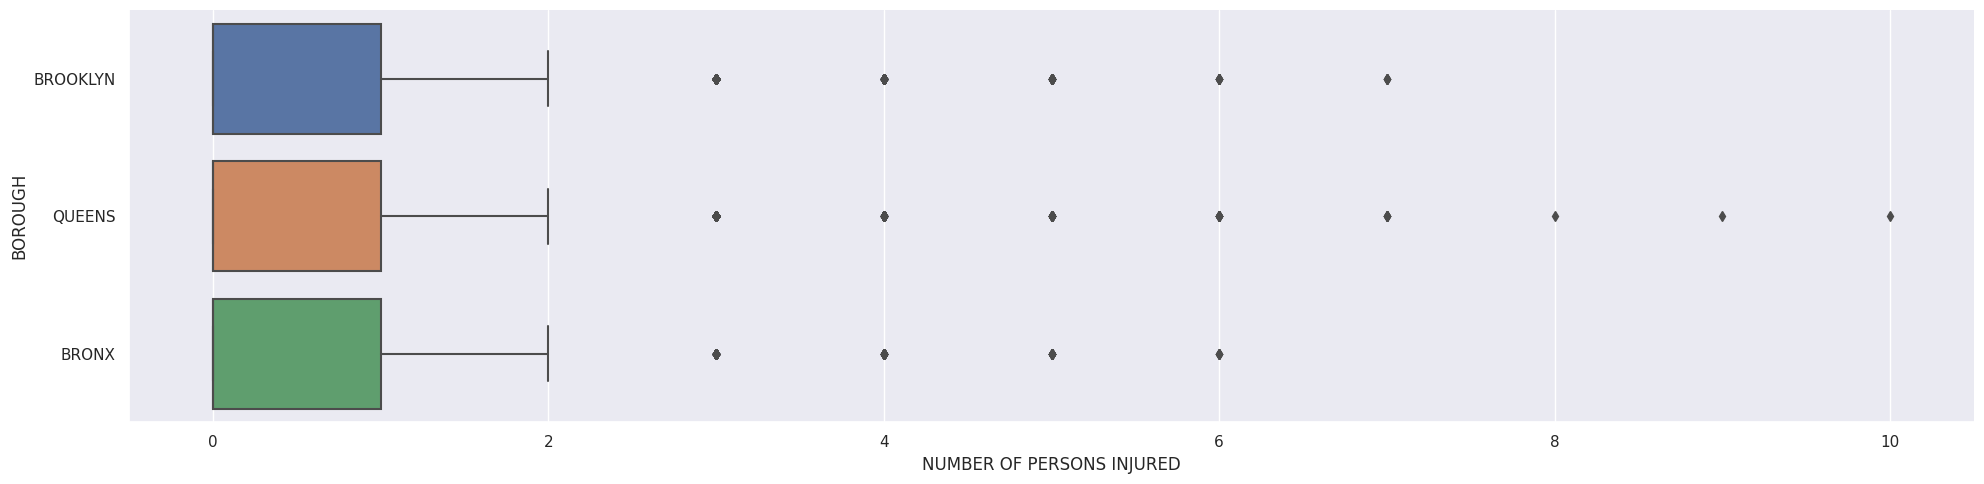

In [10]:
#Code to display Boxplot
sns.catplot(x="NUMBER OF PERSONS INJURED",y="BOROUGH",data=crashes3,kind="box",aspect=4)

This right here is a boxplot showing us the spread of the Number of persons injured in each of the three boroughs. In this box plot Brooklyn, Queens, and the Brox all had about the same average number of injuries in crashes, but queens outliers tell us that the most amount of injuries lied with Queens New York. The 3 boroughs had the same IQR, which means that most of the data for injuries was around 0-2 people injured. Meaning that the accidents that occurred in the borough were relatively safe, because if there are 0 injuries that means no one got hurt. The other values included within the boxplot are outliers of the most substantial values that were recorded for injuries. Overall, The three boroughs were about the same for injuries, so this is a good sign for a predictor to use to see what borough would most likely cause an injury in an accident. By this graph it is leaning more towards Queens, but you never know. I will need to include these as predictors since they are evenly distributed.

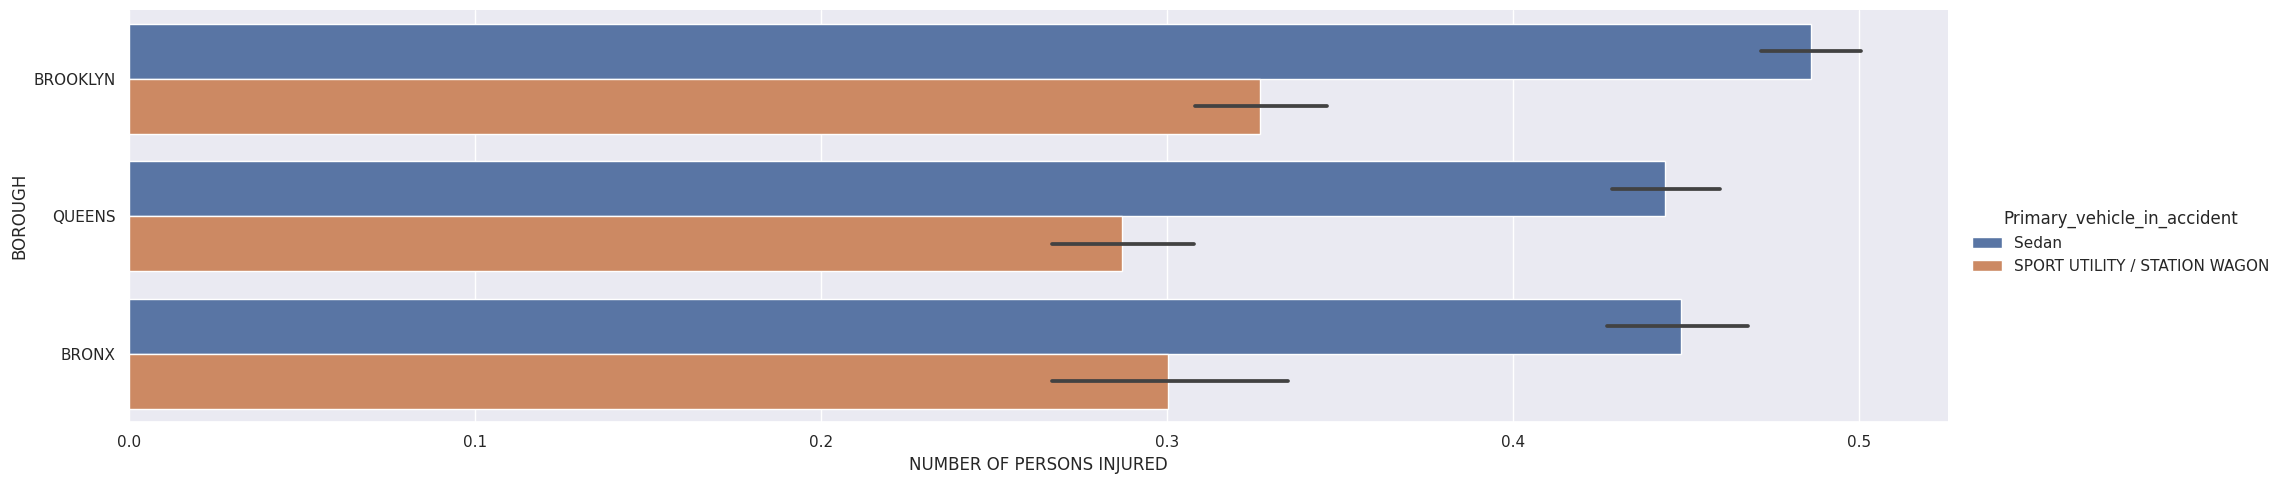

In [11]:
#Code to display barplot
sns.catplot(x="NUMBER OF PERSONS INJURED",y="BOROUGH",hue="Primary_vehicle_in_accident",data=crashes3,kind="bar",aspect=4)

In this box plot it displays the bars as Brooklyn, Queens, and the Bronx which are 3 of the boroughs in New york city. The top 3 boroughs had varying IQRs, which we can see the black bars or means are telling us that Brooklyn had the highest average of people injured in accidents at around .47-.5 for a Sedan and .3 to .35 for a SUV. The other values included Queens mean average being at around .43 to .46 for a Sedan and .26 to .31 for a SUV. The Bronx at around .43 to .47 for a Sedan and .27 to .34 for a SUV. The different coloration(hue) tells us the difference of the vehicles being tested. The blue bar is a sedan and the orange is an SUV. Overall, Brooklyn leads the injury statistics in both the Borough with the most overall injuries and the different types of cars causing injuries in that individual borough. My guess so far is that Brooklyn will hold the most injuries and Sedan will hold the most injuries. We won't know until we test the models.

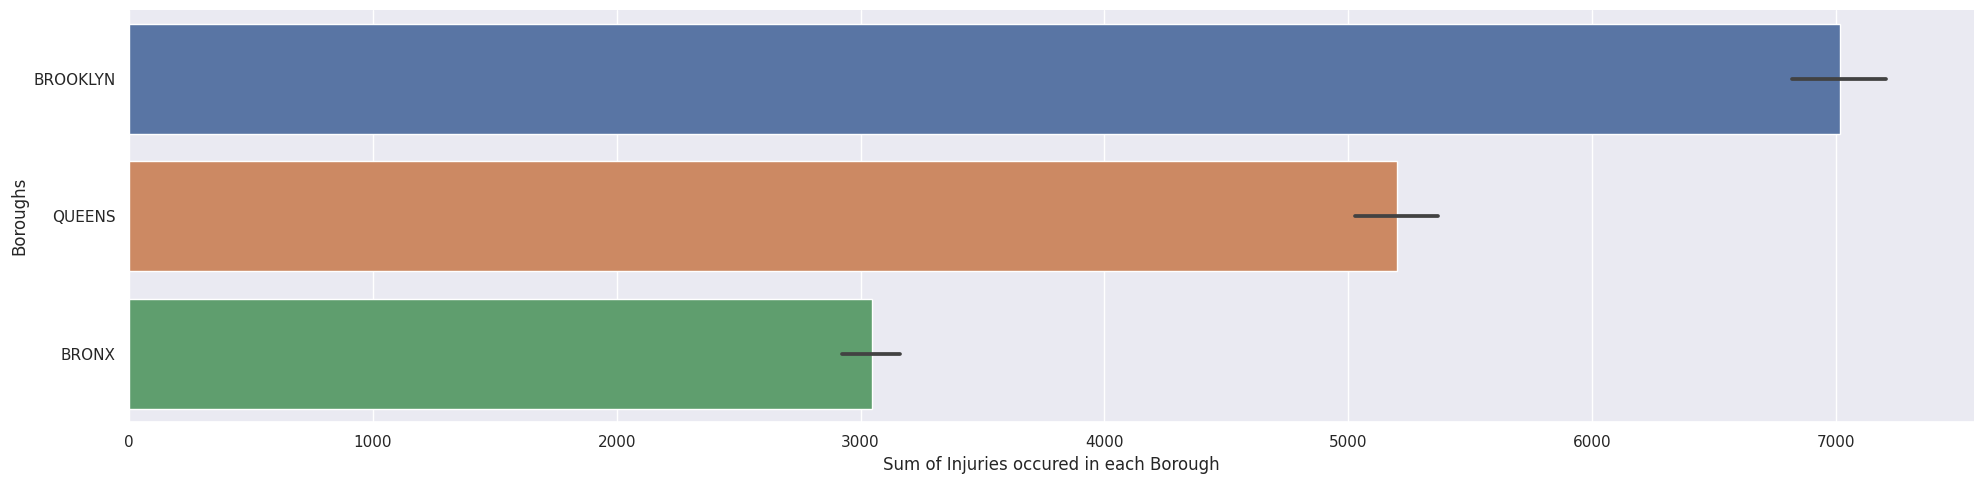

In [12]:
#Code to display barplot ; label code found on stack overflow
sns.catplot(x="NUMBER OF PERSONS INJURED",y="BOROUGH",data=crashes3,kind="bar",aspect=4,estimator=np.sum).set(xlabel='Sum of Injuries occured in each Borough', ylabel='Boroughs')
plt.show()

Here is a bar plot showing the sum of all of the number of persons injured within the three boroughs Brooklyn, Queens, and the Bronx. The black bars are the averages and for Brooklyn it shows us that the average is around 6,800 to about 7,300. Queens average is about 5,100 to 5,500. The Bronx average is about 2,800 to 3,300. We can see that Brooklyn had the most injuries recorded with 7,000. Queens followed that with about 5,300 injuries in accidents. Finally, Bronx had about 3,000 recorded injuries. Brooklyn is the overall winner in this graph. This gives us a good understanding on where the injuries take place so we can see how this will play out in the models that we are about to test. I am curious to see how this will play later in the project.

# Statistical Analyses and Interpretation

## What Primary Vehicle, out of Sedan's and SUV'S, in an accident was most likely to cause injuries within the Bronx, Queens, and Brooklyn in 2022?

### KNN Classification

In [13]:
predictors = ["BOROUGH", "NUMBER OF PERSONS INJURED","NUMBER OF PEDESTRIANS INJURED"]
target = "Primary_vehicle_in_accident" # A categorical target now
#use subset code for drop na to drop a subset
crashes3 = crashes3.dropna(subset=predictors)
X = pd.get_dummies(crashes3[predictors])
y = crashes3[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.4, 
    random_state=0)

# Standardizing using the training data
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)

In [14]:
# Fit the classification model
# Decide on a good value for K (n_neighbors)
k_n_n = KNeighborsClassifier(n_neighbors=5)
k_n_n.fit(X_train_std, y_train)

# Standardize test data
X_test_std = scaler.transform(X_test)

# Get both probabilities and predictions!
probabilities = k_n_n.predict_proba(X_test_std)
predictions = k_n_n.predict(X_test_std)
predictions
categories = k_n_n.classes_
probabilities = pd.DataFrame(probabilities, columns=categories)
probabilities

,SPORT UTILITY / STATION WAGON,Sedan
0,0.2,0.8
1,0.2,0.8
2,0.2,0.8
3,0.6,0.4
4,0.6,0.4
...,...,...
14665,0.6,0.4
14666,0.6,0.4
14667,0.2,0.8
14668,0.2,0.8


[Text(0.5, 19.049999999999997, 'Predicted Response'),
 Text(46.249999999999986, 0.5, 'True Response')]

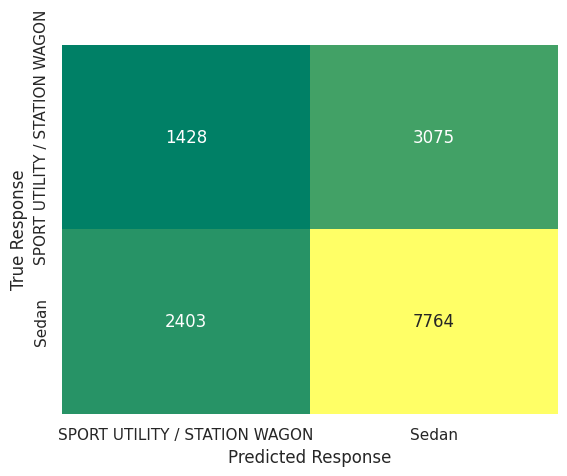

In [15]:
#Code to display confusion matrix
conf_mat = confusion_matrix(y_test,predictions)
(sns.heatmap(conf_mat, 
            cmap='summer', 
            cbar=False, 
            annot=True,
             fmt='g',
             xticklabels=categories,yticklabels=categories)
    .set(xlabel="Predicted Response",ylabel="True Response"))

In [16]:
#get accuracy, precision, recall, and specificity
print(classification_report(y_test, predictions))

                               precision    recall  f1-score   support

SPORT UTILITY / STATION WAGON       0.37      0.32      0.34      4503
                        Sedan       0.72      0.76      0.74     10167

                     accuracy                           0.63     14670
                    macro avg       0.54      0.54      0.54     14670
                 weighted avg       0.61      0.63      0.62     14670



Confusion matrix:

The classification model performed okay for what I expected. The confusion predicted most of the values for Sedan though SUV had a very small number predicted which was more than the predicted values. For Sedan, the matrix predicted 7764 right and 2403 missed in the prediction. The confusion matrix predicts 1428 values correctly and 3075 missed, which is not really that good. The matrix just thought a lot of the values were the other vehicle since the correct values should be in the upper left box and lower right box. Overall the matrix predicted not that well with getting most of the values in the wrong categories, besides a lot of the sedan values. This can tell us there is something wrong with the prediction and the sedan could be more likely to cause an injury within the city. SUVs were really hard to predict since there were more sedans to predict, the model saw more sedans so it makes sense why there are more sedans.

Classification report:

The accuracy of the graph means the proportion of cases classified correctly in this case 63% of the data was classified correctly. Precision is the proportion of predicted values that are correct. In our classification report 37% of predicted values of SUV's were predicted correctly and 72% of Sedans predicted values were predicted correctly. Finally, Recall is the proportion of all values that are correctly classified. 32% of SUV values were correctly classified and 76% of Sedan values were correctly classified. As we can see in the results of this model, the results are not terrible but could be better. The Sedan was the overall winner for injuries in the city, this could be caused by mass production of sedans in 2022 in the city. Another reason could be that sedans are less safe than SUVs by the more compact and cushioning the SUV's offer. Next we will find out what borough out of the three being predicted is most likely to hold an injury in an accident within the city.


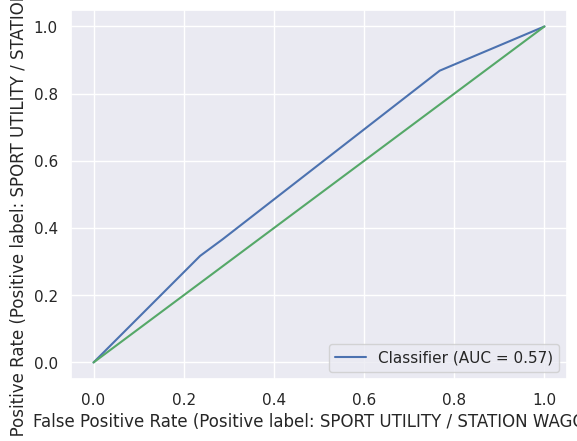

In [17]:
# Create our ROC Curve plot
RocCurveDisplay.from_predictions(y_test,
                                 probabilities[categories[0]],
                                 pos_label=categories[0])

# Draw a green line for 0
plt.plot([0, 1], [0, 1], color = 'g')


This example is an ROC curve showing us the recall of the prediction made above. The AUC is .57, meaning that around 57% of the predictions were made correct. We can see this visually by seeing that the blue line boxes/bowes out to the top left corner meaning that it is above 57% and there are more true values than false values. Overall 57% of the recall was made. This gives us good understanding that the primary vehicle in the crashes did not perform well showing us that there is some significance and the sedans and suv were more random and the model had a hard time guessing at which one was which showing us more variation than others.

## What Borough out of Brooklyn, Queens, and the Bronx is most likely to hold and injury in an accident in New York City?

### Random Forest Classifier

In [18]:
predictors = ["Primary_vehicle_in_accident","NUMBER OF PERSONS INJURED","NUMBER OF PEDESTRIANS INJURED"]
target = "BOROUGH" # A categorical target now

crashes2 = crashes3.dropna(subset=predictors)
X = pd.get_dummies(crashes3[predictors])
y = crashes3[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.4, 
    random_state=0)

In [19]:
dc = DecisionTreeClassifier(min_samples_leaf=3,max_leaf_nodes=15)
dc.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=15, min_samples_leaf=3)

In [20]:
#assigning random forest classifier to rf and fitting that
rf = RandomForestClassifier(min_samples_leaf=3,max_leaf_nodes=15)
rf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=15, min_samples_leaf=3)

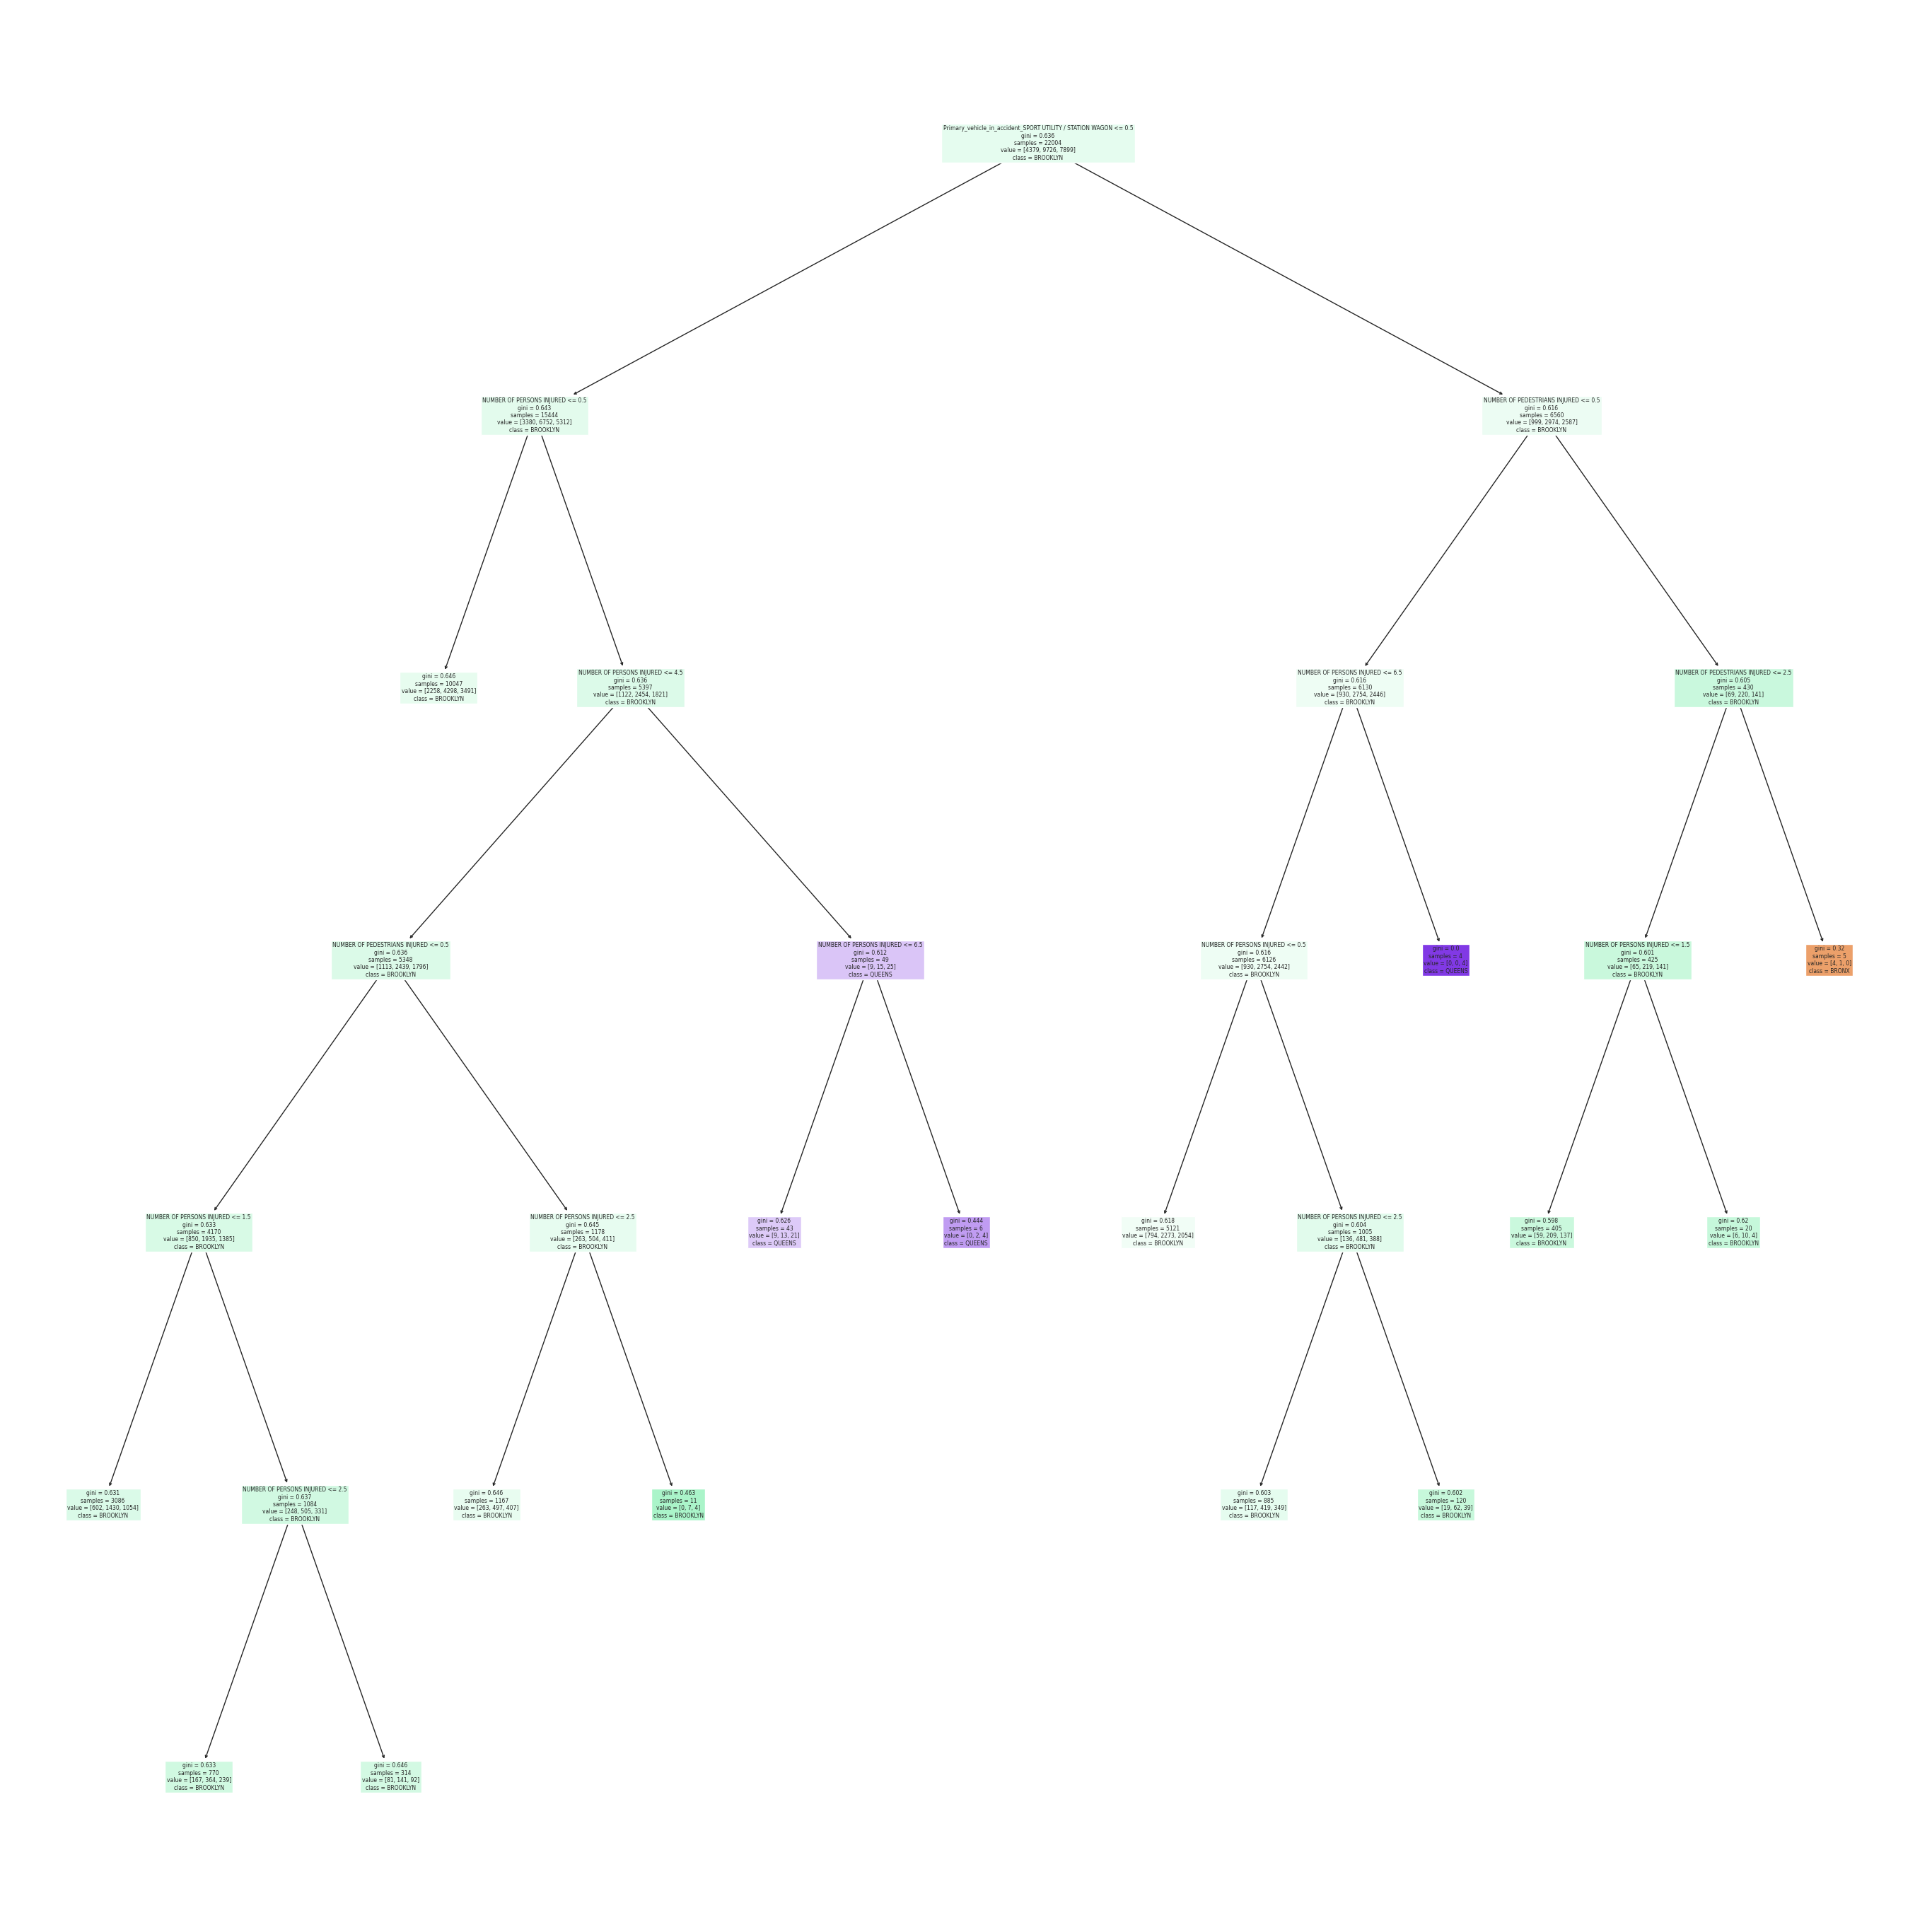

In [21]:
#code from both ski-kitlearn documentation and stack overflow
_, ax = plt.subplots(figsize=(35,35)) # Resize figure
plot_tree(dc,filled=True,feature_names=X.columns,class_names=rf.classes_)
plt.show()

This here is a Decision tree for the predictors The decision tree is a set of rules to split data into different categories. This particular tree goes through a decision making process to see if you have less than a certain number of something then you will go a certain way until you hit a dead end. The relationships between my variables must all be derived from the borough Brooklyn at the very top of the tree, which could mean that Brooklyn is most likely going to have the most predictions. Majority of what the tree is telling us is that if the accident involved a sedan and the number of persons injured was less than or equal to 6.5 then it would happen in Queens. The only occurrence of the accident happening in the Bronx would be if there were less than or equal to 2.5 people injured in the accident. This decision tree tells us something significant about the data. There must have been something that happened in Brooklyn in 2022, because there are a lot of values for that borough and most of the tree leads to the prediction being Brooklyn. Let's dig even further!

In [22]:
#printing the feature importances
print("Feature Importances:\n")
for c,f in zip(X.columns, rf.feature_importances_):
    print(f"{c}: {f:.3f}")

Feature Importances:

NUMBER OF PERSONS INJURED: 0.340
NUMBER OF PEDESTRIANS INJURED: 0.140
Primary_vehicle_in_accident_SPORT UTILITY / STATION WAGON: 0.251
Primary_vehicle_in_accident_Sedan: 0.269


Number of Persons injured is the most important at .35 and the number of pedestrians injured is .137, SUV is third most important at .28 and last is sedan at .228. These importances give us a good understanding on what to look at the most or what is being valued the most in the model being predicted. They also could help us change our predictors for the model if we wanted to , but in my opinion the predictors are just fine for what we want to predict.

In [23]:
predictions = rf.predict(X_test)
probabilities = rf.predict_proba(X_test)
categories = rf.classes_

probabilities = pd.DataFrame(probabilities, columns=categories)
probabilities

,BRONX,BROOKLYN,QUEENS
0,0.215549,0.468200,0.316251
1,0.224632,0.428565,0.346803
2,0.155169,0.444335,0.400495
3,0.224632,0.428565,0.346803
4,0.224632,0.428565,0.346803
...,...,...,...
14665,0.224632,0.428565,0.346803
14666,0.155169,0.444335,0.400495
14667,0.226573,0.425678,0.347748
14668,0.224632,0.428565,0.346803


[Text(0.5, 19.049999999999997, 'Predicted Response'),
 Text(46.24999999999999, 0.5, 'True Response')]

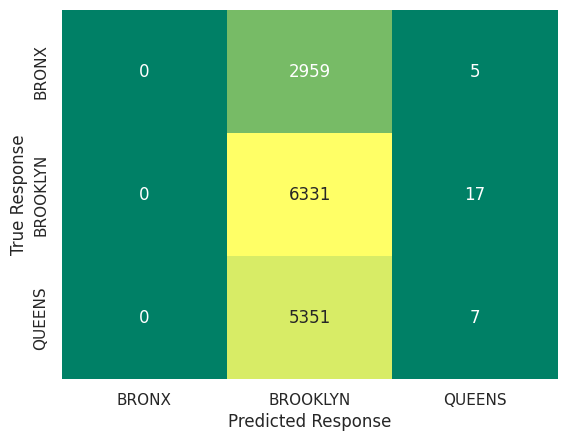

In [24]:
conf_mat = confusion_matrix(y_test,predictions)
(sns.heatmap(conf_mat, 
            cmap='summer', 
            cbar=False, 
            annot=True,
             fmt='g',
             xticklabels=categories,yticklabels=categories)
    .set(xlabel="Predicted Response",ylabel="True Response"))

In [25]:
#get accuracy, precision, recall, and specificity
print(classification_report(y_test, predictions))

/opt/tljh/user/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       BRONX       0.00      0.00      0.00      2964
    BROOKLYN       0.43      1.00      0.60      6348
      QUEENS       0.24      0.00      0.00      5358

    accuracy                           0.43     14670
   macro avg       0.22      0.33      0.20     14670
weighted avg       0.28      0.43      0.26     14670



/opt/tljh/user/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/tljh/user/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix:

The classification model performed not that well for what I expected. The confusion predicted none of the values for The Bronx, this makes sense because as we saw in the decision tree the Bronx was a very miniscule value being predicted with only one outcome. Brooklyn had the highest amount predicted in the matrix with almost all of the values being correct. We saw in the decision tree almost every outcome lead to the accident taking place in Brooklyn more than any other Borough. Queens only had a handful of values predicted correctly, but definitely not as much as Brooklyn. For Brooklyn, the matrix predicted 6331 right and 17 missed in the prediction. The Bronx on the confusion matrix predicted 0 values correctly and 2964 missed, which is not good at all. The matrix just thought a lot of the values were the other boroughs since the correct values should be in the upper left box and lower right box and the middle center box. Overall the matrix predicted not that well with getting most of the values in the wrong categories, besides Brooklyn being almost spot on. This tells us that there is a substantially huge problem with the prediction that Brooklyn is the clear of the prediction on what borough is most likely to hold an injury from an accident. My guess is that there is something that happened in Brooklyn that year and many of the crashes were caused by an event or new borough laws in Brooklyn were set in place. Let's look ahead to the classification report to see if we can find anything else about the skewing.

Classification report:

The accuracy of the graph means the proportion of cases classified correctly in this case 43% of the data was classified correctly, not very good as well. Precision is the proportion of predicted values that are correct. In our classification report 0% of predicted values of the Bronx were predicted correctly and 43% of Brooklyn's predicted values were predicted correctly. Queens only had 24% of the values predicted correctly. Finally, Recall is the proportion of all values that are correctly classified. 0% of the Bronx values were correctly classified and 100% of Brooklyn values were correctly classified. 0% of Queens values were correctly classified. As we can see in the results of this model, the results were kind of bad but could be better. Brooklyn was the overall winner for injuries in the city, this could be because of an occurrence in that particular borough or an event that could have caused a mass amount of accidents in that borough. Another reason could be that in the other boroughs they are more secluded from traffic and Brooklyn is in the middle of the city where there is more traffic and crashes are more prevalent. In the more suburban areas you don't see cars as much as in the main parts of the city, that could most definitely be the cause of this skewness.

# Conclusion

I have learned a lot from choosing this dataset and working with it for the past couple of weeks. I learned that crashes could happen almost anywhere and places that you would not most expect them to happen in the city. Who ever knew that one particular borough could have so many statistics for injuries in crashes. Just by looking at one year of crashes in New York and if I stuck with the 2021 and 2023 that would most definitely be more of a headache to work with. Looking with injuries instead of death was a good path to take, since there is a whole lot more data to work with and I am getting better prediction with injuries. These findings could be good for both the mayor of the city and for the manufacturer of the sedans and SUVs. They both could learn how to make the city a safer place to drive and to commute through, also how to make their cars more safe to prevent injuries in accidents. Even Though the data did not go the way that I wanted it to, I still gained useful knowledge that I can pass on and others could find useful to lower injuries in accidents and make the city a safer place. The main limitation that I had with the columns in the data a was using was almost all categorical and discrete numerical values. This made it hard to create visualizations for the preparatory stages and to gain good models to use. I overcame this problem with using classifiers instead and I feel like I made the right choice and I gained useful knowledge throughout the process. Future directions that this search could take would be to go into more depth on both sides of the project. I would look into each of the boroughs individually and look at the funding for safety each of them get. I would run predictions based on the money amount to the amount of injuries in the borough in specific. I would also take it farther and try to do the same thing for 2022 data and part of 2023 and see if I could get different predictions and results for the same models. On the other side for Sedans and SUV I would further this search by looking at which models in specific and most occuring in specific and look at their safety ratings. I would look at if there is correlation to the safety rating and price to see if there is a correlation between both of them. Then I would test a Regression model to see if I could predict the model of car for the target and use price and safety rating as the predictors. Overall, they would both lead me into paths that would tie into the project that I just did. I could gain information if I could take further steps to gain a better understanding of the information that I already have about this topic. Finally, I could see what vehicle would be the most likely to be a secondary vehicle in the accidents.

Title: [New York City Car Accident Statistics – November 2022 Update](https://jknylaw.com/new-york-car-accident-lawyer/statistics/)



The article tells us about the crashes in the city in 2022 and gives us some insight on how they might have happened and tells us about some statistics that will be useful relating back to this project. This source finalizes my predictions by telling us that there were actually a lot of crashes in brooklyn with 31% of them taking place in that borough. Our feature importances were spot on with the most important being the most crashes occurred and the least most occurred. In this case Brooklyn had the most with 31% taking place, Queens had 29.5% and Bronx had 19.5% taken place there. If I would have looked at fatalities Queens would have had the most with 24.9% taken place. This article states "Brooklyn is the most dangerous borough for pedestrians, while Staten Island is the safest''(Knispel Law office). That is why Brooklyn did so well is because both of the predictions lead right to Brookln having the most. It's crazy how data analyses can work. The article also states,"Typically, one out of every two-to-three accidents in NYC causes an injury"(Knispel Law Office). This tells us why there are so many injuries taken place here, because there is a high correlation between the number of crashes and crashes causing injuries. Another interesting fact that the article tells us is that the number of crashes in the city declined over 2020 to 2021 and then 2022 started to spike with them.

Closing Thoughts:

This article has given me a lot of results to my understanding of the models that I tested and helped me finalize what I thought about the models was true to my understanding. I now see how hard it is to be a data analyst and I could possibly see myself doing this one day!


Citation for article:

Knipel Law Office. “New York City Car Accident Statistics - November 2022 Update.” Law Offices of Jay S. Knispel Personal Injury Lawyers, 14 Mar. 2023, jknylaw.com/new-york-car-accident-lawyer/statistics/. 